In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

2022년도 데이터 
이용정보 데이터: https://data.seoul.go.kr/dataList/OA-15245/F/1/datasetView.do#

달별 데이터에서 2022년 데이터로 합치기

In [2]:
bike_01 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.01.csv', encoding='cp949')
bike_02 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.02.csv', encoding='cp949')
bike_03 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.03.csv', encoding='cp949')
bike_04 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.04.csv', encoding='cp949')
bike_05 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.05.csv', encoding='cp949')
bike_06 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.06.csv', encoding='cp949')
bike_07 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.07.csv', encoding='cp949')
bike_08 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.08.csv', encoding='cp949')
bike_09 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.09.csv', encoding='cp949')
bike_10 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.10.csv', encoding='cp949')
bike_11 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.11.csv', encoding='cp949')
bike_12 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.12.csv', encoding='cp949')

bike_2022= pd.concat([bike_01, bike_02,bike_03, bike_04, bike_05, bike_06, bike_07, bike_08, bike_09, bike_10, bike_11, bike_12])

In [3]:
bike_2022

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-01-01,0,1725,1725. 창1동주민센터,정기권,NaN,~10대,1,0.00,0.00,0.00,44
1,2022-01-01,0,1167,1167. 마곡수명산파크3단지 교차로,정기권,NaN,~10대,1,52.51,0.51,2210.00,15
2,2022-01-01,0,1059,1059. 래미안 강동팰리스(102동),정기권,NaN,~10대,1,25.66,0.25,1080.00,4
3,2022-01-01,0,3794,3794. 안양천합수부(현대3차아파트),정기권,NaN,~10대,1,49.61,0.50,2160.00,15
4,2022-01-01,0,4014,4014. 당고개역 3번 출구,정기권,NaN,~10대,1,23.60,0.22,961.30,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1638964,2022-12-31,23,262,262. 영문초등학교 사거리,정기권,M,기타,1,29.15,0.21,920.00,5
1638965,2022-12-31,23,201,201. 진미파라곤 앞,정기권,M,기타,1,15.36,0.10,430.88,3
1638966,2022-12-31,23,1008,1008. 암사역 3번출구(국민은행앞),정기권,M,기타,1,36.83,0.29,1240.00,7
1638967,2022-12-31,23,1637,1637. KT 전화국 버스정류장 옆,정기권,M,기타,1,222.14,2.00,8630.00,87


결측지 확인 

In [4]:
bike_2022.isna().sum()

대여일자              0
대여시간              0
대여소번호             0
대여소명              0
대여구분코드            0
성별         12315127
연령대코드             0
이용건수              0
운동량               0
탄소량               0
이동거리(M)           0
이용시간(분)           0
dtype: int64

사용하고자하는 데이터에는 결측지 없음 

In [5]:
bike_time=bike_2022.groupby(['대여일자', '대여시간'])['이용건수'].sum()
bike_time = bike_time.reset_index() #인덱스 재 정렬 , 기존 인덱스를 열로
bike_time

,대여일자,대여시간,이용건수
0,2022-01-01,0,575
1,2022-01-01,1,466
2,2022-01-01,2,328
3,2022-01-01,3,250
4,2022-01-01,4,246
...,...,...,...
8754,2022-12-31,19,2026
8755,2022-12-31,20,1750
8756,2022-12-31,21,1747
8757,2022-12-31,22,1618


대여일자에서 년도, 월, 일, 요일, 공휴일 변수 생성
대여일시에서 시간 변수 생성

In [6]:
# 년,월,일,요일 생성
bike_time['대여일자'] = pd.to_datetime(bike_time['대여일자'] )
bike_time['년도'] = bike_time['대여일자'].dt.year
bike_time['월'] = bike_time['대여일자'].dt.month
bike_time['일'] = bike_time['대여일자'].dt.day
bike_time['요일(num)'] = bike_time['대여일자'].dt.dayofweek
bike_time['공휴일'] = 0 #0: 평일 1: 공휴일
# 이번에는 토요일 일요일만 공휴일로 변경하고자 함
bike_time.loc[bike_time['요일(num)'].isin([5,6]),['공휴일']] = 1

bike_time.sample(10)

,대여일자,대여시간,이용건수,년도,월,일,요일(num),공휴일
6147,2022-09-14,4,701,2022,9,14,2,0
8146,2022-12-06,11,2968,2022,12,6,1,0
8063,2022-12-03,0,1372,2022,12,3,5,1
417,2022-01-18,9,2139,2022,1,18,1,0
6803,2022-10-11,12,6172,2022,10,11,1,0
5003,2022-07-28,12,5493,2022,7,28,3,0
5661,2022-08-24,22,9024,2022,8,24,2,0
3950,2022-06-14,14,6411,2022,6,14,1,0
1301,2022-02-24,5,434,2022,2,24,3,0
4724,2022-07-16,20,6455,2022,7,16,5,1


미세먼지 경보 발령 22년도 정보 : https://www.airkorea.or.kr/web/pmWarning?pMENU_NO=115

In [7]:
#엑셀 파일 불러오기 
conda install -c conda-forge xlrd

SyntaxError: invalid syntax (1777134694.py, line 2)

In [8]:
#0-2행까지가 Nan값
dust = pd.read_excel('미세먼지 경보발령.xls', header=3)

In [9]:
# '발령시간'과 '해제시간'을 날짜와 시간으로 분할
dust['발령시간'] = pd.to_datetime(dust['발령시간'].str.replace(' 24', ' 00'))
dust['발령날짜'] = dust['발령시간'].dt.date
dust['발령시각'] = dust['발령시간'].dt.strftime('%H:%M')

dust['해제시간'] = pd.to_datetime(dust['해제시간'])
dust['해제날짜'] = dust['해제시간'].dt.date
dust['해제시각'] = dust['해제시간'].dt.strftime('%H:%M')

# 결과 확인
print(dust[['발령날짜', '발령시각', '해제날짜', '해제시각']])


         발령날짜   발령시각        해제날짜   해제시각
0  2022-12-13  17:00  2022-12-13  18:00
1  2022-12-13  10:00  2022-12-13  17:00
2  2022-12-13  04:00  2022-12-13  10:00
3  2022-11-09  00:00  2022-11-11  05:00
4  2022-04-27  06:00  2022-04-27  23:00
5  2022-03-05  08:00  2022-03-05  12:00
6  2022-03-05  01:00  2022-03-05  04:00
7  2022-02-11  23:00  2022-02-13  21:00
8  2022-01-08  22:00  2022-01-10  21:00


시간 단위로 경보 발령을 나타냄

In [10]:
from datetime import datetime, timedelta

new_rows = []
for index, row in dust.iterrows():
    start_time = row['발령시간']
    end_time = row['해제시간']
    
    current_time = start_time
    while current_time <= end_time:
        new_rows.append({
            '지역': row['지역'],
            '권역': row['권역'],
            '항목': row['항목'],
            '경보단계': row['경보단계'],
            '발령날짜': current_time.date(),
            '발령시각': current_time.time(),
        })
        current_time += timedelta(hours=1)

dust = pd.DataFrame(new_rows)

In [11]:
# 변환 후 시간 추출하여 '시각' 열에 저장
dust['시각'] = dust['발령시각'].apply(lambda x: x.strftime('%H:%M'))
dust = dust.drop(columns='발령시각')


In [12]:
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      193 non-null    object
 1   권역      193 non-null    object
 2   항목      193 non-null    object
 3   경보단계    193 non-null    object
 4   발령날짜    193 non-null    object
 5   시각      193 non-null    object
dtypes: object(6)
memory usage: 9.2+ KB


In [13]:
dust.isna().sum()

지역      0
권역      0
항목      0
경보단계    0
발령날짜    0
시각      0
dtype: int64

2022년도 기상청 날씨

날씨 데이터 : https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36&tabNo=1

In [44]:
weather = pd.read_csv('seoul_weather.csv', encoding='cp949')
weather.head(5)

,지점,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
0,108,2022-01-01 00:01,-8.5,0.0,297.3,1.6,1021.8,1033.1,41.3,0.0,0.0
1,108,2022-01-01 00:02,-8.5,0.0,293.5,1.2,1021.8,1033.1,41.2,0.0,0.0
2,108,2022-01-01 00:03,-8.5,0.0,328.0,1.7,1021.9,1033.2,41.0,0.0,0.0
3,108,2022-01-01 00:04,-8.6,0.0,311.4,1.9,1021.9,1033.2,41.2,0.0,0.0
4,108,2022-01-01 00:05,-8.6,0.0,312.4,1.3,1021.8,1033.1,41.4,0.0,0.0


일시에서 시간 일시로 나누기

In [45]:
weather['일시'] = weather['일시'].astype(str)

weather['날짜'] = weather['일시'].str[:10]  
weather['시간'] = weather['일시'].str[11:13].astype(int)  

결측지 확인

In [46]:
weather.isnull().sum()

지점                0
일시                0
기온(°C)          132
누적강수량(mm)     16470
풍향(deg)         105
풍속(m/s)         106
현지기압(hPa)        35
해면기압(hPa)        32
습도(%)             8
일사(MJ/m^2)       40
일조(Sec)          46
날짜                0
시간                0
dtype: int64

In [48]:
# 날짜 시간으로 정렬 (되어있더라도 확실하게 하기위해 한번 더 정렬)
weather = weather.sort_values(['날짜','시간'])
# 1. 강수량과 적설이 0인 경우는 0으로 fill
weather['누적강수량(mm)'].fillna(0, inplace = True)

# 전 값으로 채우기 같은 메소드는 이미 만들어져 있음!! 찾아보기 
weather['기온(°C)'].fillna(method='ffill',inplace = True)
weather['풍속(m/s)'].fillna(method='ffill',inplace = True)
weather['습도(%)'].fillna(method='ffill',inplace = True)

weather.isnull().sum()

지점              0
일시              0
기온(°C)          0
누적강수량(mm)       0
풍향(deg)       105
풍속(m/s)         0
현지기압(hPa)      35
해면기압(hPa)      32
습도(%)           0
일사(MJ/m^2)     40
일조(Sec)        46
날짜              0
시간              0
dtype: int64

In [49]:
weather['날짜'] = pd.to_datetime(weather['날짜'])
#데이터 타입 맞추기 
bike_mg = pd.merge (bike_time, 
                       weather, 
                       left_on =['대여일자', '대여시간'], 
                       right_on = ['날짜', '시간']) #default = inner 
bike_mg.head()

,대여일자,대여시간,이용건수,년도,월,일,요일(num),공휴일,지점,일시,...,누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec),날짜,시간
0,2022-01-01,0,575,2022,1,1,5,1,108,2022-01-01 00:01,...,0.0,297.3,1.6,1021.8,1033.1,41.3,0.0,0.0,2022-01-01,0
1,2022-01-01,0,575,2022,1,1,5,1,108,2022-01-01 00:02,...,0.0,293.5,1.2,1021.8,1033.1,41.2,0.0,0.0,2022-01-01,0
2,2022-01-01,0,575,2022,1,1,5,1,108,2022-01-01 00:03,...,0.0,328.0,1.7,1021.9,1033.2,41.0,0.0,0.0,2022-01-01,0
3,2022-01-01,0,575,2022,1,1,5,1,108,2022-01-01 00:04,...,0.0,311.4,1.9,1021.9,1033.2,41.2,0.0,0.0,2022-01-01,0
4,2022-01-01,0,575,2022,1,1,5,1,108,2022-01-01 00:05,...,0.0,312.4,1.3,1021.8,1033.1,41.4,0.0,0.0,2022-01-01,0


In [50]:
# 시각 열의 데이터 유형을 문자열에서 정수형으로 변환
# dust['시각'] = dust['시각'].astype(int)
dust['시간'] = dust['시각'].apply(lambda x: int(str(x).split(':')[0]) if pd.notnull(x) else None)


# bike_mg의 '대여일자' 열을 datetime으로 변환
bike_mg['대여일자'] = pd.to_datetime(bike_mg['대여일자'])

# dust의 '발령날짜' 열을 datetime으로 변환
dust['발령날짜'] = pd.to_datetime(dust['발령날짜'])

# merge 함수로 병합 시도
bike_mg = pd.merge(bike_mg, dust, left_on=['대여일자', '대여시간'], right_on=['발령날짜', '시간'])


In [51]:
bike_mg.sample(100)

,대여일자,대여시간,이용건수,년도,월,일,요일(num),공휴일,지점,일시,...,날짜,시간_x,지역,권역,항목,경보단계,발령날짜,시각,시(시간),시간_y
3672,2022-02-12,12,3823,2022,2,12,5,1,108,2022-02-12 12:13,...,2022-02-12,12,서울,서울권역,PM2.5,주의보,2022-02-12,12:00,12,12
8520,2022-11-09,20,8479,2022,11,9,2,0,108,2022-11-09 20:01,...,2022-11-09,20,서울,서울권역,PM2.5,주의보,2022-11-09,20:00,20,20
4429,2022-02-13,0,933,2022,2,13,6,1,108,2022-02-13 00:50,...,2022-02-13,0,서울,서울권역,PM2.5,주의보,2022-02-13,00:00,0,0
1477,2022-01-09,22,1375,2022,1,9,6,1,108,2022-01-09 22:37,...,2022-01-09,22,서울,서울권역,PM2.5,주의보,2022-01-09,22:00,22,22
3140,2022-02-12,3,337,2022,2,12,5,1,108,2022-02-12 03:21,...,2022-02-12,3,서울,서울권역,PM2.5,주의보,2022-02-12,03:00,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,2022-02-13,0,933,2022,2,13,6,1,108,2022-02-13 00:32,...,2022-02-13,0,서울,서울권역,PM2.5,주의보,2022-02-13,00:00,0,0
4389,2022-02-13,0,933,2022,2,13,6,1,108,2022-02-13 00:10,...,2022-02-13,0,서울,서울권역,PM2.5,주의보,2022-02-13,00:00,0,0
7569,2022-11-09,4,589,2022,11,9,2,0,108,2022-11-09 04:10,...,2022-11-09,4,서울,서울권역,PM2.5,주의보,2022-11-09,04:00,4,4
975,2022-01-09,14,3145,2022,1,9,6,1,108,2022-01-09 14:15,...,2022-01-09,14,서울,서울권역,PM2.5,주의보,2022-01-09,14:00,14,14


In [52]:
bike_mg = bike_mg.drop(['대여일자', '지점','일시','풍향(deg)','현지기압(hPa)','해면기압(hPa)','일사(MJ/m^2)','일조(Sec)','날짜','시간_x','시간_y','시각','지역','권역','항목','발령날짜'], axis = 1)

In [53]:
#시간 time
bike_mg['시간'] = bike_mg['대여시간'].astype(str) + ':00'

In [54]:
# 칼럼 선택
bike_mg = bike_mg[['년도', '월', '일', '요일(num)', '공휴일','시간','이용건수','기온(°C)',
       '누적강수량(mm)', '풍속(m/s)','습도(%)','경보단계' ]]

#칼럼명 변경
bike_mg.columns = ['년도','월','일','요일','공휴일','시간','이용건수', '기온', '강수량(mm)','풍속(m/s)','습도(%)','미세먼지 경보단계']

In [55]:
bike_mg.head()

,년도,월,일,요일,공휴일,시간,이용건수,기온,강수량(mm),풍속(m/s),습도(%),미세먼지 경보단계
0,2022,1,8,5,1,22:00,1791,3.4,0.0,1.3,77.6,주의보
1,2022,1,8,5,1,22:00,1791,3.4,0.0,1.4,76.8,주의보
2,2022,1,8,5,1,22:00,1791,3.4,0.0,1.0,77.7,주의보
3,2022,1,8,5,1,22:00,1791,3.4,0.0,1.8,77.6,주의보
4,2022,1,8,5,1,22:00,1791,3.4,0.0,1.6,77.4,주의보


In [56]:
bike_mg.isnull().sum()

년도           0
월            0
일            0
요일           0
공휴일          0
시간           0
이용건수         0
기온           0
강수량(mm)      0
풍속(m/s)      0
습도(%)        0
미세먼지 경보단계    0
dtype: int64

In [57]:
bike_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11579 entries, 0 to 11578
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   년도         11579 non-null  int64  
 1   월          11579 non-null  int64  
 2   일          11579 non-null  int64  
 3   요일         11579 non-null  int64  
 4   공휴일        11579 non-null  int64  
 5   시간         11579 non-null  object 
 6   이용건수       11579 non-null  int64  
 7   기온         11579 non-null  float64
 8   강수량(mm)    11579 non-null  float64
 9   풍속(m/s)    11579 non-null  float64
 10  습도(%)      11579 non-null  float64
 11  미세먼지 경보단계  11579 non-null  object 
dtypes: float64(4), int64(6), object(2)
memory usage: 1.1+ MB


In [59]:
#저장
bike_mg.to_csv('bike_mg.csv', index = False, encoding='utf-8-sig')
#불러오기
bike_mg = pd.read_csv('bike_mg.csv')

In [60]:
data = bike_mg.copy()

In [61]:
desc_df = data.describe().T
desc_df

,count,mean,std,min,25%,50%,75%,max
년도,11579.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0
월,11579.0,5.383798,4.549097,1.0,2.0,3.0,11.0,12.0
일,11579.0,11.974264,5.183524,5.0,9.0,10.0,13.0,27.0
요일,11579.0,3.378530,2.087892,0.0,2.0,3.0,5.0,6.0
공휴일,11579.0,0.419725,0.493535,0.0,0.0,0.0,1.0,1.0
이용건수,11579.0,3871.410225,3574.623987,213.0,1244.0,2876.0,5071.0,18327.0
기온,11579.0,6.922195,6.506086,-3.4,1.8,4.8,11.5,23.9
강수량(mm),11579.0,0.011063,0.072319,0.0,0.0,0.0,0.0,0.6
풍속(m/s),11579.0,2.008714,1.104723,0.0,1.3,1.9,2.6,9.0
습도(%),11579.0,60.885931,20.902591,16.7,42.2,65.0,79.6,92.3


<Axes: xlabel='이용건수', ylabel='Count'>

/Users/jiyoungjung/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/Users/jiyoungjung/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  func(*args, **kwargs)
/Users/jiyoungjung/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  func(*args, **kwargs)
/Users/jiyoungjung/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/Users/jiyoungjung/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyoungjung/anaconda3/lib/python3.11/s

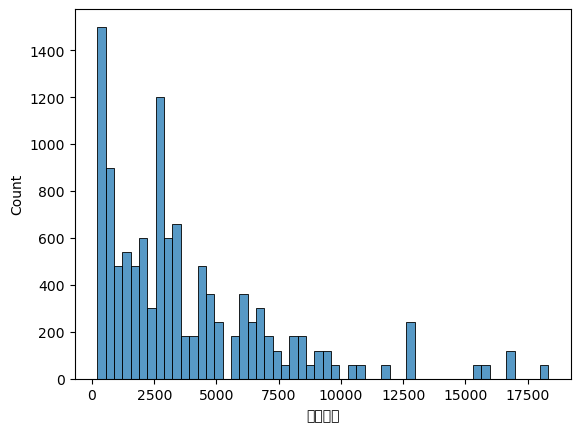

In [62]:
sns.histplot(data['이용건수'])

<Axes: >

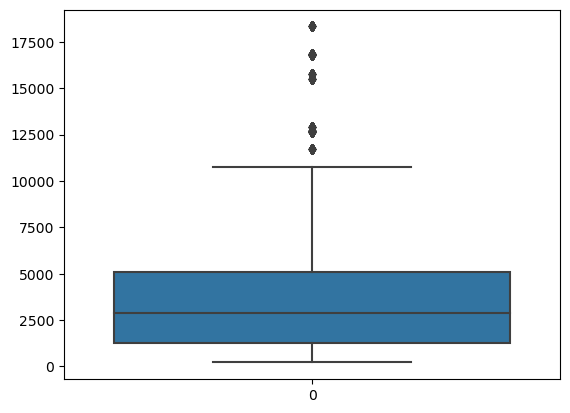

In [63]:
sns.boxplot(data['이용건수'])

아웃라이어 조정or제거 

In [ ]:
sns.lineplot(x=data['년도'].map(str) + data['월'].map(str), y=data['이용건수'])